In [1]:
#load data

In [2]:
from __future__ import division
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import seaborn as sns

In [3]:
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/candy-power-ranking/candy-data.csv'
df = pd.read_csv(url)

In [8]:
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [11]:
# Choose variable = "sugarpercent"
mean_value = df['sugarpercent'].mean()
std_dev = df['sugarpercent'].std()
median_value = df['sugarpercent'].median()
min_value = df['sugarpercent'].min()
max_value = df['sugarpercent'].max()
print("Choose variable sugerpercent")
print(f"Mean: {mean_value}")
print(f"Standard Deviation: {std_dev}")
print(f"Median: {median_value}")
print(f"Minimum: {min_value}")
print(f"Maximum: {max_value}")

Choose variable sugerpercent
Mean: 0.4786470514588235
Standard Deviation: 0.28277787067790333
Median: 0.465
Minimum: 0.011
Maximum: 0.98799998


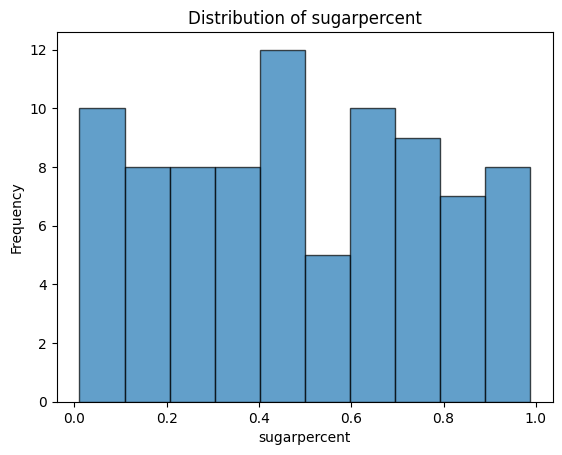

In [15]:
# Plot the histogram
plt.hist(df['sugarpercent'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of sugarpercent')
plt.xlabel('sugarpercent')
plt.ylabel('Frequency')
plt.show()

In [16]:
#explain
print('The average sugar content percentage across all candies is about 47.8%. This suggests that, on average, the candies have nearly half of their content as sugar.')

The average sugar content percentage across all candies is about 47.8%. This suggests that, on average, the candies have nearly half of their content as sugar.


In [17]:
print('The standard deviation shows that the sugar percentages vary by about 28.2% from the mean, indicating a moderate level of variability.')

The standard deviation shows that the sugar percentages vary by about 28.2% from the mean, indicating a moderate level of variability.


In [18]:
print('The middle value (when all candies are ordered by sugar content) is 46.5%, which is close to the mean, indicating that the data is fairly symmetric.')

The middle value (when all candies are ordered by sugar content) is 46.5%, which is close to the mean, indicating that the data is fairly symmetric.


In [19]:
print('The candy with the lowest sugar content has just 1.1% sugar, representing a possible outlier or a very low-sugar product. The candy with the highest sugar content has 98.8% sugar, indicating that some candies are extremely sugar-dense.')

The candy with the lowest sugar content has just 1.1% sugar, representing a possible outlier or a very low-sugar product. The candy with the highest sugar content has 98.8% sugar, indicating that some candies are extremely sugar-dense.


In [20]:
print('The histogram visualizes the distribution of sugarpercent across all candies.')
print('There is no strong skew; the distribution is roughly uniform.')
print(" Some bins (e.g., around 0.4-0.5 and 0.6-0.7) have a slightly higher frequency, suggesting these sugar percentages are more common among candies.")
print('The low frequency around 0.2 and 0.8 indicates that fewer candies have sugar content in those ranges.')

The histogram visualizes the distribution of sugarpercent across all candies.
There is no strong skew; the distribution is roughly uniform.
 Some bins (e.g., around 0.4-0.5 and 0.6-0.7) have a slightly higher frequency, suggesting these sugar percentages are more common among candies.
The low frequency around 0.2 and 0.8 indicates that fewer candies have sugar content in those ranges.


   chocolate      mean       std
0          0  0.452937  0.310936
1          1  0.512000  0.241524


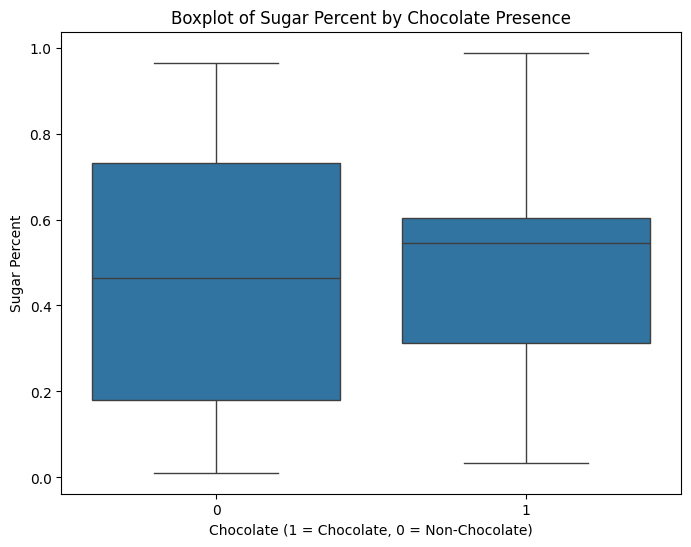

In [21]:
#question 2
# Group by 'chocolate' and calculate mean and standard deviation for 'sugarpercent'
grouped_stats = df.groupby('chocolate')['sugarpercent'].agg(['mean', 'std']).reset_index()
print(grouped_stats)

# Boxplot for visualization
plt.figure(figsize=(8, 6))
sns.boxplot(x='chocolate', y='sugarpercent', data=df)
plt.title('Boxplot of Sugar Percent by Chocolate Presence')
plt.xlabel('Chocolate (1 = Chocolate, 0 = Non-Chocolate)')
plt.ylabel('Sugar Percent')
plt.show()

In [23]:
#Interpretation of the Results:
print("we find Chocolate candies tend to have slightly higher average sugar content (mean = 51.2%) compared to non-chocolate candies (mean = 45.3%).")
print("However, non-chocolate candies have a higher variability (std = 31.1%), indicating more diversity in sugar levels")

print("Through box plot, we find the non-chocolate group (chocolate = 0) has a wider spread in sugar content. This is evident from the taller box and larger whiskers, showing more variation.")
print("The chocolate group (chocolate = 1) has a tighter range, with the middle 50% of data (IQR) concentrated around the median (close to 50% sugar content).")
print("Both groups have similar lower bounds (near 0%), but the upper bounds differ slightly, with non-chocolate candies reaching closer to 100% sugar content.")

print("So, higher Sugar in Chocolate Candies, greater variability in Non-Chocolate Candies")

we find Chocolate candies tend to have slightly higher average sugar content (mean = 51.2%) compared to non-chocolate candies (mean = 45.3%).
However, non-chocolate candies have a higher variability (std = 31.1%), indicating more diversity in sugar levels
Through box plot, we find the non-chocolate group (chocolate = 0) has a wider spread in sugar content. This is evident from the taller box and larger whiskers, showing more variation.
The chocolate group (chocolate = 1) has a tighter range, with the middle 50% of data (IQR) concentrated around the median (close to 50% sugar content).
Both groups have similar lower bounds (near 0%), but the upper bounds differ slightly, with non-chocolate candies reaching closer to 100% sugar content.
So, higher Sugar in Chocolate Candies, greater variability in Non-Chocolate Candies


In [24]:
#question3
# use chocolate and hard as the two categorical variable
#Cross-Tabulation
crosstab = pd.crosstab(df['chocolate'], df['hard'])
print(crosstab)



hard        0   1
chocolate        
0          34  14
1          36   1


In [26]:
print("this value shows for Non-Chocolate Candies, 34 candies are not hard (hard = 0) and 14 candies are hard (hard = 1).")
print(" for Chocolate Candies, 36 candies are not hard (hard = 0), Only 1 candy is hard (hard = 1).")

this value shows for Non-Chocolate Candies, 34 candies are not hard (hard = 0) and 14 candies are hard (hard = 1).
 for Chocolate Candies, 36 candies are not hard (hard = 0), Only 1 candy is hard (hard = 1).


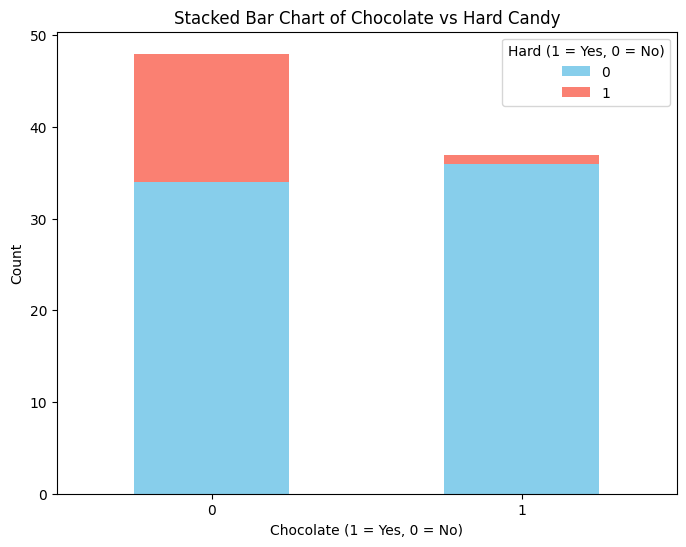

In [25]:
# Plotting the stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'salmon'])
plt.title('Stacked Bar Chart of Chocolate vs Hard Candy')
plt.xlabel('Chocolate (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.legend(title='Hard (1 = Yes, 0 = No)')
plt.xticks(rotation=0)
plt.show()

In [28]:
print('this graph shows for Non-Chocolate Candies, a larger portion of non-chocolate candies are not hard, but there is still a significant proportion (about 29%) of hard candies.')

print('for Chocolate Candies, almost all chocolate candies are not hard, with only a negligible number (1 candy) being hard.')

print('The data suggests a strong relationship between the chocolate and hard variables. Chocolate candies are predominantly not hard, while non-chocolate candies show a more diverse distribution in terms of texture.')

this graph shows for Non-Chocolate Candies, a larger portion of non-chocolate candies are not hard, but there is still a significant proportion (about 29%) of hard candies.
for Chocolate Candies, almost all chocolate candies are not hard, with only a negligible number (1 candy) being hard.
The data suggests a strong relationship between the chocolate and hard variables. Chocolate candies are predominantly not hard, while non-chocolate candies show a more diverse distribution in terms of texture.
